In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from os import linesep

In [245]:
df = pd.read_csv('chess_games.csv')

In [246]:
print(df.dtypes)

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object


In [247]:
print(df.head())

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

In [248]:
def mean(col: pd.core.frame.Series):
    return col.mean()

def var(col: pd.core.frame.Series):
    return col.var(ddof=0)

def med(col: pd.core.frame.Series):
    return col.median()

def IQR(col: pd.core.frame.Series):
    return col.quantile(0.75) - col.quantile(0.25)

def EDF(
        col: pd.core.frame.Series,
        title: str,
        xlabel: str,
        ylabel: str,
        figsize: tuple[int, int],
        ):
    outsorted = np.sort(col)
    count = len(outsorted)
    edf = np.arange(1, count + 1) / count

    plt.figure(figsize=figsize)
    plt.step(outsorted, edf, where='post')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def hist(
        col: pd.core.frame.Series,
        title: str,
        xlabel: str,
        ylabel: str,
        figsize: tuple[int, int],
        ):
    plt.figure(figsize=figsize)
    plt.hist(col, bins='auto', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def boxplot(
        col: pd.core.frame.Series,
        title: str,
        xlabel: str,
        figsize: tuple[int, int]
        ):
    plt.figure(figsize=figsize)
    plt.boxplot(col, vert=False)
    plt.title(title)
    plt.yticks([])
    plt.xlabel(xlabel)
    plt.show()

def violinplot(
        col: pd.core.frame.Series,
        title: str,
        xlabel: str,
        figsize: tuple[int, int]
        ):
    plt.figure(figsize=figsize)
    sb.violinplot(x=col)
    plt.title(title)
    plt.yticks([]) 
    plt.xlabel(xlabel)
    plt.show()



In [249]:
rated = df[df['rated'] == True]
unrated = df[df['rated'] == False]

all_count = len(df)
rated_count = len(rated)
unrated_count = len(unrated)

turns = df['turns']
short_games = (turns < 20).sum()
long_games = (turns > 19).sum()

rated_turns = rated['turns']
unrated_turns = unrated['turns']

offset = len(str(all_count)) + 2
separator = '-' * 28

print(
    f'Всего игр          : {all_count:>{offset}}',
    separator,
    f'Рейтинговых игр    : {rated_count:>{offset}}',
    f'Нерейтинговых игр  : {unrated_count:>{offset}}',
    separator,
    f'Быстрых игр        : {short_games:>{offset}}',
    f'Долгих игр         : {long_games:>{offset}}',
    f'Выборочное среднее : {mean(turns):>{offset}}',
    f'Дисперсия          : {var(turns):>{offset}}',
    f'Выборочная медиана : {med(turns):>{offset}}',
    f'IQR                : {IQR(turns):>{offset}}',
    sep=linesep
)

Всего игр          :   20058
----------------------------
Рейтинговых игр    :   16155
Нерейтинговых игр  :    3903
----------------------------
Быстрых игр        :    1661
Долгих игр         :   18397
Выборочное среднее : 60.46599860404826
Дисперсия          : 1126.9279744265611
Выборочная медиана :    55.0
IQR                :    42.0


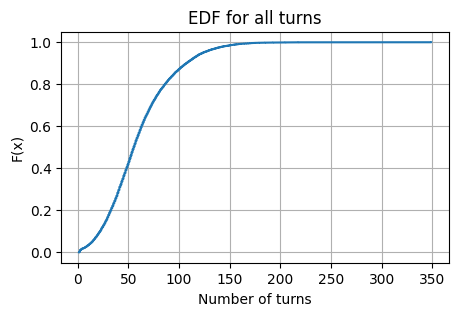

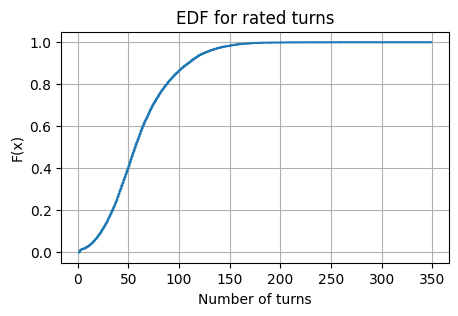

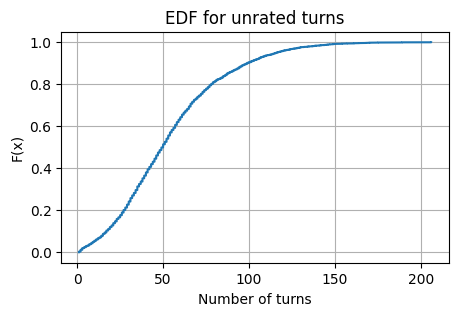

In [250]:
fig_size = (5, 3)

EDF(
    turns,
    'EDF for all turns',
    'Number of turns',
    'F(x)',
    fig_size
)

EDF(
    rated_turns,
    'EDF for rated turns',
    'Number of turns',
    'F(x)',
    fig_size
)

EDF(
    unrated_turns,
    'EDF for unrated turns',
    'Number of turns',
    'F(x)',
    fig_size
)

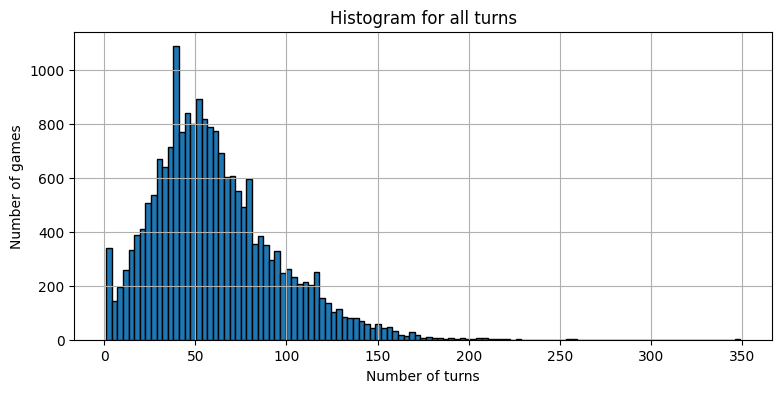

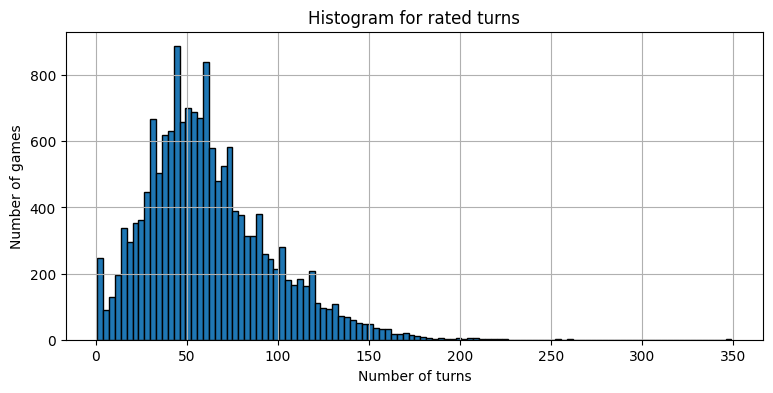

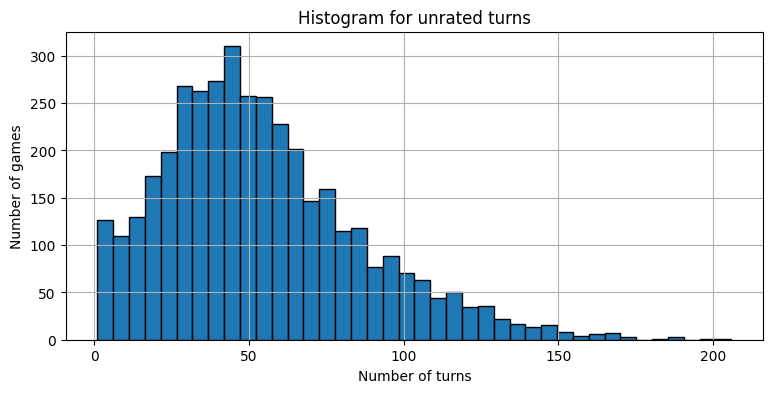

In [251]:
fig_size = (9, 4)

hist(
    turns,
    'Histogram for all turns',
    'Number of turns',
    'Number of games',
    fig_size
)

hist(
    rated_turns,
    'Histogram for rated turns',
    'Number of turns',
    'Number of games',
    fig_size
)

hist(
    unrated_turns,
    'Histogram for unrated turns',
    'Number of turns',
    'Number of games',
    fig_size
)

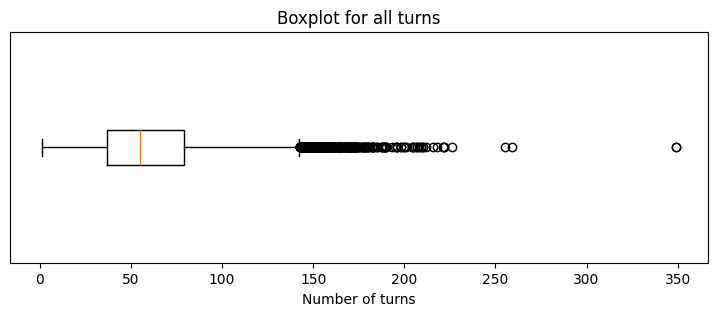

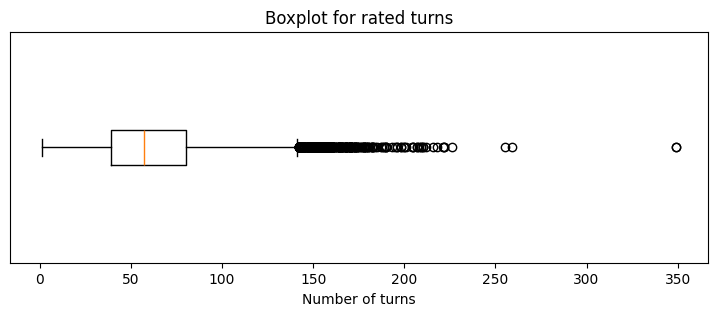

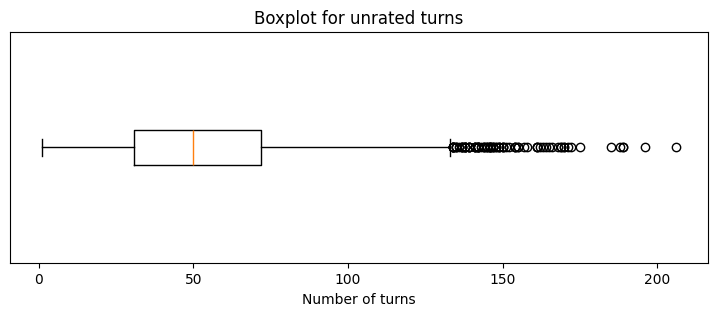

In [252]:
fig_size = (9, 3)

boxplot(
    turns,
    'Boxplot for all turns',
    'Number of turns',
    fig_size
)

boxplot(
    rated_turns,
    'Boxplot for rated turns',
    'Number of turns',
    fig_size
)

boxplot(
    unrated_turns,
    'Boxplot for unrated turns',
    'Number of turns',
    fig_size
)

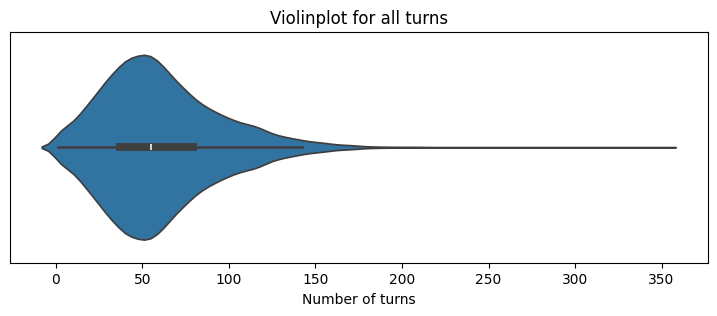

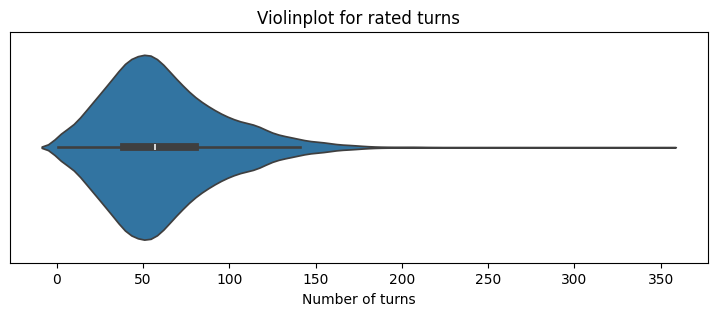

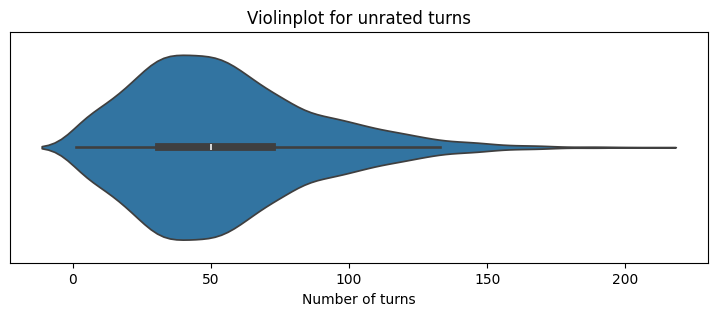

In [253]:
violinplot(
    turns,
    'Violinplot for all turns',
    'Number of turns',
    fig_size
)

violinplot(
    rated_turns,
    'Violinplot for rated turns',
    'Number of turns',
    fig_size
)

violinplot(
    unrated_turns,
    'Violinplot for unrated turns',
    'Number of turns',
    fig_size
)